# BIENVENIDO A SAICC: C & T Technology

---

## "**S**istema de **A**nálisis de **I**mágenes de **C**upones de **C**orrosión".

*   Versión: **Alpha 1.0**
*   Desarrollado por: **Luis Eduardo Ríos Carrillo**

---
SAICC en su implementación como notebook colaborativa reune los elementos correspondientes a:


*   Segmentación de fotografías panoramicas de testigos/cupones de corrosión.
*   Extracción de datos de la segmentación de las fotografías.
*   Reducción de imágenes.
*   Exportación de gráficos.
*   Creación automática de reportes.
---
Para hacer uso de este Colab Notebook es necesario seguir las instrucciones descritas a lo largo del documento. 
Para interactuar con cada una de las celdas del documento es necesario dar clic en el botón de RUN que se encuentra en la esquina superior izquierda de cada un de las celdas.


---
## **Antes de comenzar:**
---
*   Es de suma importancia tener imagenes de cupones de corrosión dentro de nuestro google drive.
*   Estas imagenes deben de estar en formato BMP o PNG y su nombre no debe de contener espacios o caracteres especiales.
*   **Es recomendable utilizar guiones altos "-" en lugar de espacios.**
---
## **Uso básico de éste Colab Notebook:**
---

*   El código de programación se encuentra dispuesto intercalado con las instrucciones.
*   Cada bloque de código o texto se denomina "celda".
*   Las celdas de texto no necesitan ejecutarse para representar su contenido.
*   Las celdas de **código python** tienen un corchete "**[  ]**" en la **esquina superiór izquierda**, el cual al acercar el cursor del ratón cambia a un boton de ejecución, **al precionarlo; corremos ese bloque en especifico** y **su funcionalidad se verá reflejada justo debajo del bloque.** 
*   **NO es recomendable realizar cambios en los bloques de código, ya que pueden mermar la funcionalidad del programa.**
*   **Los cambios que se pueden realizar serían los correspondientes a la declaración del URL de las imágenes.**
---

## **Uso rápido de éste Colab Notebook**

---

1.   Cambie los enlaces de origen de las imágenes. 
2.   Introduzca la información del análisis.
3.   Ir al menú "Entorno de ejecución" y seleccionar la opción de "Ejecutar todas".
4.   Compruebe las carpetas de resultados en: [Carpeta de resultados](https://drive.google.com/drive/folders/1njoplDTuCoiY5GhiFXvMM7LVctxwCmC3?usp=sharing)
---

### Acceso a google drive:


> Este paso es requisito para poder manipular rutas desde google drive.



**Ejecute la siguiente celda, de clic en el enlace aparecido, inicie sesión, permita el acceso a su drive y copie el código de autorización en el campo correspondiente.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---
## ***1. Carga de fotografías y declaración de información del análisis:***
---

El programa funciona unicamente utilizando archivos que esten alojados en google drive, esto con la finalidad de aprovechar el procesamiento de tercero, ya que el analisis de imagenes en local resulta costoso en terminos de hardware.


---

**Cambiar el path o ruta de las imagenes en las variables de abajo y ejecutar la celda:**


**¡IMPORTANTE; EL PATH NO PUEDE INCLUIR NINGUN ESPACIO VACÍO O CARACTERES ESPECIALES!**

In [ ]:
#------------------------------------------------------------------------
imagePath_SideA = '/content/drive/MyDrive/TESTIGOS_SEPTIEMBRE_2021/HPA_13/HPA_13_10_ppm_0852.bmp'
imagePath_SideB = '/content/drive/MyDrive/TESTIGOS_SEPTIEMBRE_2021/HPA_13/HPA_13_10_ppm_LADO_B.bmp'
#------------------------------------------------------------------------

**Ejecutar la siguiente celda y rellenar los datos solicitados.**

> ***NO utilizar espacios***



In [ ]:
#------------------------------------------------------------------------
analysis_Name = input("Nombre del analisis: ") 
date = input("Fecha de análisis(DD/MM/AA): ")
hour = input("Hora del análisis(hh:mm): ")
analisis_id = input("id(numérico): ")
#------------------------------------------------------------------------

Nombre del analisis: HPA1310ppm
Fecha de análisis(DD/MM/AA): 15/10/2021
Hora del análisis(hh:mm): 11:35
id(numérico): 00


---
## ***2. Importación de módulos y librerías:***
---

Los bloques siguientes son declaraciones que importan los modulos de manipulación de imagenes, datos y complementos necesarios para mostrar y guardar los archivos, segun corresponda.

---

**Ejecute las siguientes celdas:**

---




In [ ]:
pip install python-docx

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
from skimage import io
from docx import Document
from docx.shared import Cm

In [ ]:
plt.rcParams.update({'font.size': 14})

---
## ***3. Funcionalidad de manipulación de imágenes***
---

Dentro de las siguientes celdas se encuentran las funcionalidades de segmentación y extracción de información a las fotografías panoramicas, contemplando segmentación, reducción de tamaño, conteo de pixeles y morfología de la imagen.

---

**Ejecute las siguientes celdas:**

---

In [ ]:
def imageResize(imagen, porcentaje):
    rzImage = cv2.resize(imagen, (0,0), fx = porcentaje, fy = porcentaje, interpolation = cv2.INTER_CUBIC )
    return rzImage
    
def sizeInfo(imagenSegmentada):
    height, width = imagenSegmentada.shape
    totalOfPixels = height * width
    return height, width, totalOfPixels

def redPixelsSegmentation(imagen):
    minRed1  = np.array([0, 100, 20], np.uint8)
    maxRed1  = np.array([30, 255, 255], np.uint8)
    minRed2 = np.array([100, 100, 20], np.uint8)
    maxRed2 = np.array([179, 255, 255], np.uint8)
    frameHSV = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)
    redDetect1 = cv2.inRange(frameHSV, minRed1, maxRed1)
    redDetect2 = cv2.inRange(frameHSV, minRed2, maxRed2)
    redPixelsMask = cv2.add(redDetect1, redDetect2)
    return redPixelsMask

def numSegmentedPixels(imagenSegmentada):
    invertedMask = cv2.bitwise_not(imagenSegmentada)
    count = cv2.countNonZero(invertedMask)
    return count
    
def porcentOfRed(totalPixeles, pixelesRojos):
    result = (pixelesRojos * 100) / totalPixeles
    return result


In [ ]:
scale = 0.10
#------------------------------------------------------------------------
original_SideA = cv2.imread(imagePath_SideA)
original_SideB = cv2.imread(imagePath_SideB)
#------------------------------------------------------------------------
original_SideA_RGB = cv2.cvtColor(original_SideA, cv2.COLOR_BGR2RGB)
original_SideB_RGB = cv2.cvtColor(original_SideB, cv2.COLOR_BGR2RGB)
#------------------------------------------------------------------------
reduced_SideA = imageResize(original_SideA, scale)
reduced_SideB = imageResize(original_SideB, scale)
#------------------------------------------------------------------------
reduced_SideA_RGB = imageResize(original_SideA_RGB, scale)
reduced_SideB_RGB = imageResize(original_SideB_RGB, scale)
#------------------------------------------------------------------------
segmented_SideA = redPixelsSegmentation(original_SideA_RGB)
segmented_SideB = redPixelsSegmentation(original_SideB_RGB)

reduced_Segmented_SideA = redPixelsSegmentation(reduced_SideA)
reduced_Segmented_SideB = redPixelsSegmentation(reduced_SideB)
#------------------------------------------------------------------------
height_SideA, width_SideA, totalOfPixels_SideA = sizeInfo(segmented_SideA)
numOfRedPixels_SideA = numSegmentedPixels(segmented_SideA)
areaSegmented_SideA = (numOfRedPixels_SideA * 100) / totalOfPixels_SideA

print(f'H: {height_SideA} W: {width_SideA} Pixels: {totalOfPixels_SideA} RedPixels: {numOfRedPixels_SideA} RedArea: {areaSegmented_SideA} ScaleOfReduction: {scale}')
#------------------------------------------------------------------------
height_SideB, width_SideB, totalOfPixels_SideB = sizeInfo(segmented_SideB)
numOfRedPixels_SideB = numSegmentedPixels(segmented_SideB)
areaSegmented_SideB = (numOfRedPixels_SideB * 100) / totalOfPixels_SideB

print(f'H: {height_SideB} W: {width_SideB} Pixels: {totalOfPixels_SideB} RedPixels: {numOfRedPixels_SideB} RedArea: {areaSegmented_SideB} ScaleOfReduction: {scale}')
#------------------------------------------------------------------------
"""
cv2_imshow(reduced_SideA)
cv2_imshow(reduced_SideB)
cv2_imshow(reduced_Segmented_SideA)
cv2_imshow(reduced_Segmented_SideB)
"""
#------------------------------------------------------------------------
cv2.imwrite(f'/content/drive/MyDrive/SAICC_Alpha_1_0/results/segmented/segmented_{analysis_Name}sA.bmp', segmented_SideA)
cv2.imwrite(f'/content/drive/MyDrive/SAICC_Alpha_1_0/results/segmented/segmented_{analysis_Name}sB.bmp', segmented_SideB)

cv2.imwrite(f'/content/drive/MyDrive/SAICC_Alpha_1_0/results/resized/resized_{analysis_Name}sA.bmp', reduced_SideA)
cv2.imwrite(f'/content/drive/MyDrive/SAICC_Alpha_1_0/results/resized/resized_{analysis_Name}sB.bmp', reduced_SideB)

cv2.imwrite(f'/content/drive/MyDrive/SAICC_Alpha_1_0/results/resized_segmented/resized_segmented_{analysis_Name}sA.bmp', reduced_Segmented_SideA)
cv2.imwrite(f'/content/drive/MyDrive/SAICC_Alpha_1_0/results/resized_segmented/resized_segmented_{analysis_Name}sB.bmp', reduced_Segmented_SideB)
#------------------------------------------------------------------------

H: 11196 W: 1986 Pixels: 22235256 RedPixels: 4904901 RedArea: 22.059116387056662 ScaleOfReduction: 0.1
H: 11256 W: 1987 Pixels: 22365672 RedPixels: 4666854 RedArea: 20.8661470131548 ScaleOfReduction: 0.1


False

---
## ***4. Funcionalidad de graficación de dispersión de color y area***
---

Las funciones declaradas en las siguientes celdas permiten exportar las **graficas de dispersión de color RGB y HSV** para apreciar la distribución de los colores dentro de las imágenes del testigo.

Las funciones de gráfico de área realizan un plot de pastel con la relación de los porcentajes de cada uno de los actores en las fotografías.

```
def piePlot_A(porcentaje, analysis_Name)
def piePlot_B(porcentaje, analysis_Name)
```
---

**Ejecute las siguientes celdas:**

---

In [ ]:
def plotHSVValues_A(imagen, analysis_Name):
    image_hsv = cv2.cvtColor(imagen, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(image_hsv)
    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5)
    axis = fig.add_subplot(1, 1, 1, projection="3d")
    pixel_colors = imagen.reshape((np.shape(imagen)[0]*np.shape(imagen)[1], 3))
    norm = colors.Normalize(vmin=-1.,vmax=1.)
    norm.autoscale(pixel_colors)
    pixel_colors = norm(pixel_colors).tolist()
    axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
    axis.set_xlabel("Hue")
    axis.set_ylabel("Saturation")
    axis.set_zlabel("Value")
    plt.savefig(f'/content/drive/MyDrive/SAICC_Alpha_1_0/results/plots/hsv_dispersion/hsv_dispersion_{analysis_Name}sA.png')
    plt.show()
    
def plotHSVValues_B(imagen, analysis_Name):
    image_hsv = cv2.cvtColor(imagen, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(image_hsv)
    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5)
    axis = fig.add_subplot(1, 1, 1, projection="3d")
    pixel_colors = imagen.reshape((np.shape(imagen)[0]*np.shape(imagen)[1], 3))
    norm = colors.Normalize(vmin=-1.,vmax=1.)
    norm.autoscale(pixel_colors)
    pixel_colors = norm(pixel_colors).tolist()
    axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
    axis.set_xlabel("Hue")
    axis.set_ylabel("Saturation")
    axis.set_zlabel("Value")
    plt.savefig(f'/content/drive/MyDrive/SAICC_Alpha_1_0/results/plots/hsv_dispersion/hsv_dispersion_{analysis_Name}sB.png')
    plt.show()

In [ ]:
def piePlot_A(porcentaje, analysis_Name):
    otherPercent = 100 - porcentaje 
    manzanas = [porcentaje, otherPercent]
    nombres = [analysis_Name+"_sA", "Metal y metal con inhibidor"]
    colores = ["#92140C", "#2B4162"]
    f = plt.figure()
    f.set_figwidth(9)
    f.set_figheight(9)
    plt.pie(manzanas, labels=nombres, autopct="%0.1f %%", colors = colores)
    plt.show()
    f.savefig(f'/content/drive/MyDrive/SAICC_Alpha_1_0/results/plots/pie_area/pie_plot_{analysis_Name}sA.png', dpi=300)
    
def piePlot_B(porcentaje, analysis_Name):
    otherPercent = 100 - porcentaje 
    manzanas = [porcentaje, otherPercent]
    nombres = [analysis_Name+"_sB", "Metal y metal con inhibidor"]
    colores = ["#92140C", "#2B4162"]
    f = plt.figure()
    f.set_figwidth(9)
    f.set_figheight(9)
    plt.pie(manzanas, labels=nombres, autopct="%0.1f %%", colors = colores)
    plt.show()
    f.savefig(f'/content/drive/MyDrive/SAICC_Alpha_1_0/results/plots/pie_area/pie_plot_{analysis_Name}sB.png', dpi=300)

In [ ]:
def plot_RGB_Values_A(imagen, analysis_Name):
    r, g, b = cv2.split(imagen)
    fig = plt.figure()
    axis = fig.add_subplot(1, 1, 1, projection="3d")
    fig.set_size_inches(18.5, 10.5)
    pixel_colors = imagen.reshape((np.shape(imagen)[0]*np.shape(imagen)[1], 3))
    norm = colors.Normalize(vmin=-1.,vmax=1.)
    norm.autoscale(pixel_colors)
    pixel_colors = norm(pixel_colors).tolist()
    axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
    axis.set_xlabel("Red")
    axis.set_ylabel("Green")
    axis.set_zlabel("Blue")
    plt.savefig(f'/content/drive/MyDrive/SAICC_Alpha_1_0/results/plots/rgb_dispersion/rgb_dispersion{analysis_Name}_sA.png', dpi=300)
    plt.show()
    

def plot_RGB_Values_B(imagen, analysis_Name):
    r, g, b = cv2.split(imagen)
    fig = plt.figure()
    axis = fig.add_subplot(1, 1, 1, projection="3d")
    fig.set_size_inches(18.5, 10.5)
    pixel_colors = imagen.reshape((np.shape(imagen)[0]*np.shape(imagen)[1], 3))
    norm = colors.Normalize(vmin=-1.,vmax=1.)
    norm.autoscale(pixel_colors)
    pixel_colors = norm(pixel_colors).tolist()
    axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
    axis.set_xlabel("Red")
    axis.set_ylabel("Green")
    axis.set_zlabel("Blue")
    plt.savefig(f'/content/drive/MyDrive/SAICC_Alpha_1_0/results/plots/rgb_dispersion/rgb_dispersion{analysis_Name}_sB.png', dpi=300)
    plt.show()


FileNotFoundError: ignored

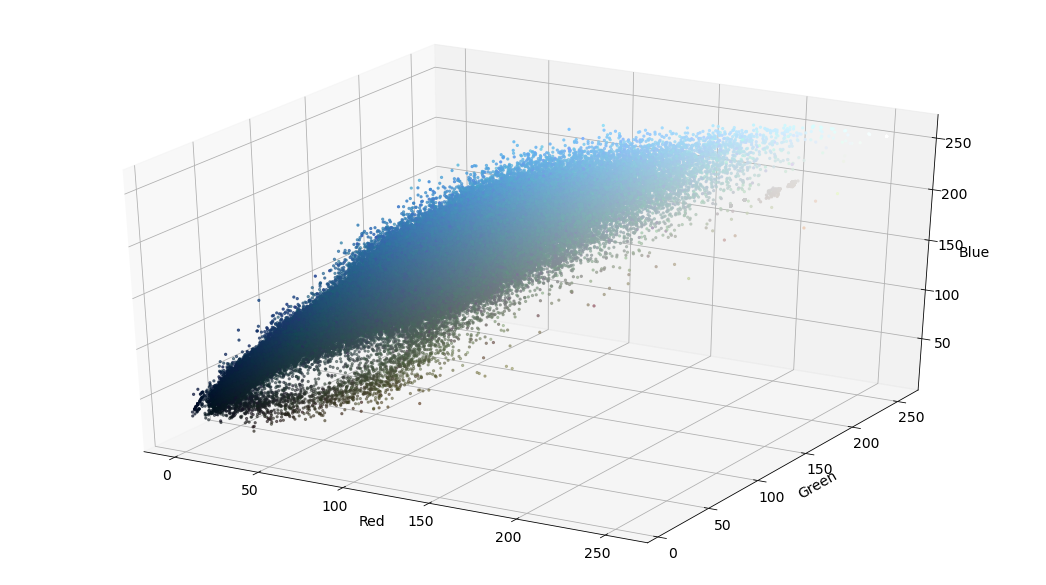

In [ ]:
#------------------------------------------------------------------------
plot_RGB_Values_A(reduced_SideA_RGB, analysis_Name)
plot_RGB_Values_B(reduced_SideB_RGB, analysis_Name)
#------------------------------------------------------------------------

In [ ]:
#------------------------------------------------------------------------
plotHSVValues_A(reduced_SideA_RGB, analysis_Name)
plotHSVValues_B(reduced_SideB_RGB, analysis_Name)
#------------------------------------------------------------------------

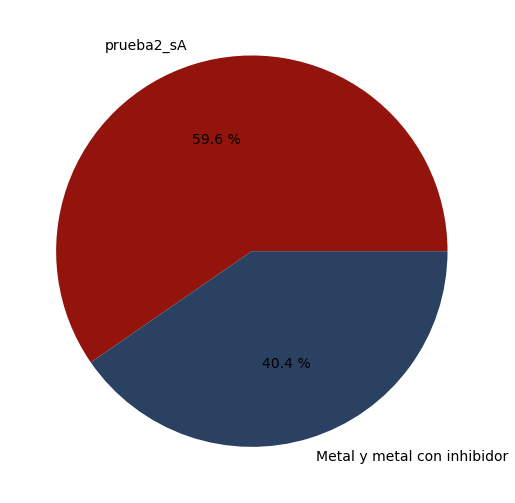

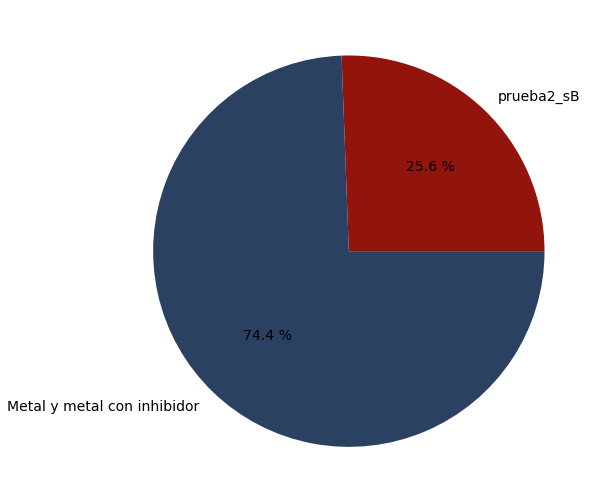

In [ ]:
#------------------------------------------------------------------------
piePlot_A(areaSegmented_SideA, analysis_Name)
piePlot_B(areaSegmented_SideB, analysis_Name)
#------------------------------------------------------------------------

---
## ***5. Funcionalidad de exportación de reporte de análisis ***
---

La funcion de exportación de documentos genera un archivo .docx en la carpeta de resultados, donde se puede consultar un desglose general de lo realizado.

---

**Ejecute las siguientes celdas:**

---

In [ ]:
document = Document()
#--------------------------------------------------
document.add_heading('Reporte de datos', level=1)
#--------------------------------------------------
document.add_heading(f'Análisis #{analisis_id}', level=2)

par = document.add_paragraph('Nombre de la prueba: ')
par.add_run(f'{analysis_Name}').bold = True

par = document.add_paragraph('Fecha de análisis: ')
par.add_run(f'{date}').bold = True

par = document.add_paragraph('Hora de la prueba: ')
par.add_run(f'{hour}').bold = True

#--------------------------------------------------
document.add_heading('Entrada', level=3)

par = document.add_paragraph('')
par.add_run('Archivos:').bold = True

table = document.add_table(rows=3, cols=2)
table.rows[0].cells[0].text = 'Lado A'
table.rows[0].cells[1].text = 'Lado B'
cell = table.rows[1].cells[0]
paragraph = cell.paragraphs[0]
run = paragraph.add_run()
run.add_picture(f'/content/drive/MyDrive/SAICC_Alpha_1_0/results/resized/resized_{analysis_Name}sA.bmp',  width = Cm(2.35)  , height = Cm (11.77))

cell = table.rows[1].cells[1]
paragraph = cell.paragraphs[0]
run = paragraph.add_run()
run.add_picture(f'/content/drive/MyDrive/SAICC_Alpha_1_0/results/resized/resized_{analysis_Name}sB.bmp',  width = Cm(2.35)  , height = Cm (11.77))


table.rows[2].cells[0].text = f'Dimensiones: {width_SideA} X {height_SideA} \nFormato: BMP'
table.rows[2].cells[1].text = f'Dimensiones: {width_SideB} X {height_SideB} \nFormato: BMP'

#--------------------------------------------------
document.add_heading('Salida', level=3)

par = document.add_paragraph('')
par.add_run('Archivos: ').bold = True

table = document.add_table(rows=3, cols=2)
table.rows[0].cells[0].text = 'Lado A'
table.rows[0].cells[1].text = 'Lado B'
                                                                                                                                                                                     
cell = table.rows[1].cells[0]
paragraph = cell.paragraphs[0]
run = paragraph.add_run()
run.add_picture(f'/content/drive/MyDrive/SAICC_Alpha_1_0/results/resized_segmented/resized_segmented_{analysis_Name}sA.bmp',  width = Cm(2.35)  , height = Cm (11.77))

cell = table.rows[1].cells[1]
paragraph = cell.paragraphs[0]
run = paragraph.add_run()
run.add_picture(f'/content/drive/MyDrive/SAICC_Alpha_1_0/results/resized_segmented/resized_segmented_{analysis_Name}sB.bmp',  width = Cm(2.35)  , height = Cm (11.77))


table.rows[2].cells[0].text = f'Dimensiones: {width_SideA} X {height_SideA} \nFormato: BMP'
table.rows[2].cells[1].text = f'Dimensiones: {width_SideB} X {height_SideB} \nFormato: BMP'

par = document.add_paragraph('')
par.add_run('Datos: ').bold = True

table = document.add_table(rows=2, cols=2)
table.rows[0].cells[0].text = 'Lado A'
table.rows[0].cells[1].text = 'Lado B'


table.rows[1].cells[0].text = f'Número de píxeles: {totalOfPixels_SideA} \nNúmero de píxeles corrosión: {numOfRedPixels_SideA} \nPorcentaje de corrosión:  {areaSegmented_SideA}%'
table.rows[1].cells[1].text = f'Número de píxeles: {totalOfPixels_SideB} \nNúmero de píxeles corrosión: {numOfRedPixels_SideB} \nPorcentaje de corrosión:  {areaSegmented_SideB}%'


par = document.add_paragraph('')
par.add_run('Gráficos: ').bold = True


document.add_paragraph("Graficos de dispersión de color:  ")
document.add_paragraph("Dispersión HSV:  ")
document.add_picture(f'/content/drive/MyDrive/SAICC_Alpha_1_0/results/plots/hsv_dispersion/hsv_dispersion_{analysis_Name}sA.png', width = Cm(15.87)  , height = Cm (9))
document.add_picture(f'/content/drive/MyDrive/SAICC_Alpha_1_0/results/plots/hsv_dispersion/hsv_dispersion_{analysis_Name}sB.png', width = Cm(15.87)  , height = Cm (9))

document.add_paragraph("Dispersión RGB:  ")
document.add_picture(f'/content/drive/MyDrive/SAICC_Alpha_1_0/results/plots/rgb_dispersion/rgb_dispersion{analysis_Name}_sA.png',  width = Cm(15.87)  , height = Cm (9))
document.add_picture(f'/content/drive/MyDrive/SAICC_Alpha_1_0/results/plots/rgb_dispersion/rgb_dispersion{analysis_Name}_sB.png',  width = Cm(15.87)  , height = Cm (9))

document.add_paragraph("Gráficas pastel de la superficie: ")
document.add_picture(f'/content/drive/MyDrive/SAICC_Alpha_1_0/results/plots/rgb_dispersion/rgb_dispersion{analysis_Name}_sA.png',  width = Cm(15.87)  , height = Cm (9))
document.add_picture(f'/content/drive/MyDrive/SAICC_Alpha_1_0/results/plots/rgb_dispersion/rgb_dispersion{analysis_Name}_sB.png',  width = Cm(15.87)  , height = Cm (9))

document.save(f"/content/drive/MyDrive/SAICC_Alpha_1_0/results/reports/reporte_{analisis_id}.docx")

FileNotFoundError: ignored